# Tensors 1D

In [11]:
import numpy as np
import torch

In [30]:
c = torch.tensor([20, 1, 2, 3, 4])
c.type()

'torch.LongTensor'

In [31]:
c[0]=100
c[0]

tensor(100)

Can apply functions to torch tensors.(mean, max/min...)

In [32]:
x = torch.tensor([0, np.pi/2, np.pi])
y = torch.sin(x)
y

tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])

Plotting mathematical functions:

In [33]:
x = torch.linspace(0,   2 * np.pi, 100)
y = torch.sin(x)

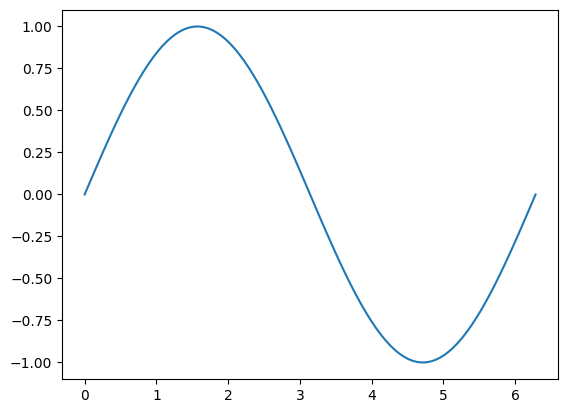

In [34]:
import matplotlib.pyplot as plt
plt.plot(x.numpy(), y.numpy())

# Tensors 2D

### Matrix Multiplication

In [35]:
A = torch.tensor([[0,1,1],[1,0,1]])
B = torch.tensor([[1,1],[1,1],[-1,1]])
C = torch.mm(A,B)
C

tensor([[0, 2],
        [0, 2]])

### Practice

In [36]:
# Convert 2D List to 2D Tensor

twoD_list = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]
twoD_tensor = torch.tensor(twoD_list)
print("The number of elements in twoD_tensor: ", twoD_tensor.numel())

The number of elements in twoD_tensor:  9


In [37]:
# Convert tensor to numpy array; Convert numpy array to tensor

twoD_numpy = twoD_tensor.numpy()
print("Tensor -> Numpy Array:")
print("The numpy array after converting: ", twoD_numpy)
print("Type after converting: ", twoD_numpy.dtype)

print("================================================")

new_twoD_tensor = torch.from_numpy(twoD_numpy)
print("Numpy Array -> Tensor:")
print("The tensor after converting:", new_twoD_tensor)
print("Type after converting: ", new_twoD_tensor.dtype)

Tensor -> Numpy Array:
The numpy array after converting:  [[11 12 13]
 [21 22 23]
 [31 32 33]]
Type after converting:  int64
Numpy Array -> Tensor:
The tensor after converting: tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
Type after converting:  torch.int64


In [38]:
# Use tensor_obj[row, column] and tensor_obj[row][column] to access certain position

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
print(tensor_example)
print("What is the value on 2nd-row 3rd-column? ", tensor_example[1, 2])
print("What is the value on 2nd-row 3rd-column? ", tensor_example[1][2])

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
What is the value on 2nd-row 3rd-column?  tensor(23)
What is the value on 2nd-row 3rd-column?  tensor(23)


In [39]:
# Escalar multiplication
# Calculate 2 * [[2, 1], [1, 2]]

Y = torch.tensor([[2, 1], [1, 2]]) 
two_Y = 2 * Y
print(Y)
print("The result of 2Y: \n", two_Y)

tensor([[2, 1],
        [1, 2]])
The result of 2Y: 
 tensor([[4, 2],
        [2, 4]])


In [40]:
# Element wise Product/Hadamard Product
# Calculate [[1, 0], [0, 1]] * [[2, 1], [1, 2]]

X = torch.tensor([[1, 0], [0, 1]])
Y = torch.tensor([[2, 1], [1, 2]]) 
X_times_Y = X * Y
print("The result of X * Y: ", X_times_Y)

The result of X * Y:  tensor([[2, 0],
        [0, 2]])


# Differentiation Pytorch
This is used for generating parameters in neural networks

In [41]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2
y.backward()
x.grad


tensor(4.)

In [42]:
x = torch.tensor(2.0, requires_grad=True)
z = x**2 +2*x +1
z.backward()
x.grad

tensor(6.)

### Partial Derivatives

Considering the function: $f(u,v)=vu+u^{2}$

In [43]:
# Calculate f(u, v) = v * u + u^2 at u = 1, v = 2

u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
print("The result of v * u + u^2: ", f)

The result of v * u + u^2:  tensor(3., grad_fn=<AddBackward0>)


In [44]:
# Calculate the derivative with respect to u

f.backward()
print("The partial derivative with respect to u: ", u.grad)

The partial derivative with respect to u:  tensor(4.)


In [45]:
# Calculate the derivative with respect to v

print("The partial derivative with respect to u: ", v.grad)

The partial derivative with respect to u:  tensor(1.)


In [46]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 100, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

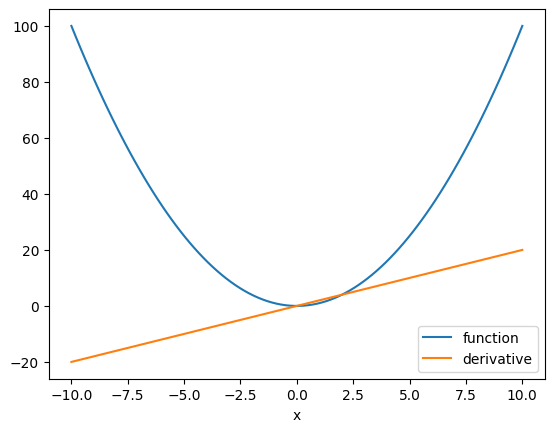

In [47]:
# Take the derivative with respect to multiple value. Plot out the function and its derivative

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

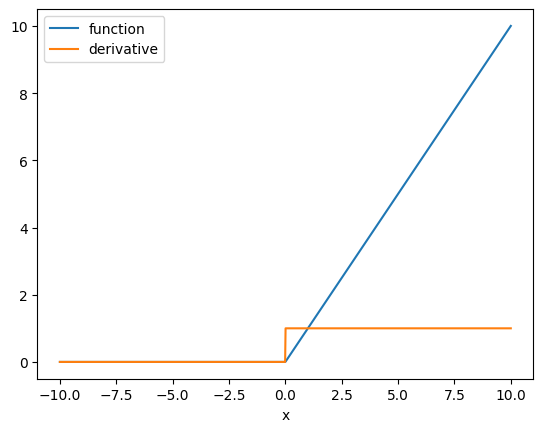

In [48]:
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative

x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

In [49]:
y.grad_fn

### Simple Dataset

In [2]:
from torch.utils.data import Dataset

class toy_set(Dataset):
    def __init__(self, length=100, transform=None):
        
        self.x = 2*torch.ones(length,2)
        self.y = torch.ones(length,1)
        self.len=length
        self.transform = transform

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):

        return self.len


In [21]:
# Create Dataset Object. Find out the value on index 1. Find out the length of Dataset Object.

our_dataset = toy_set()
print("Our toy_set object: ", our_dataset)
print("Value on index 0 of our toy_set object: ", our_dataset[0])
print("Our toy_set length: ", len(our_dataset))

Our toy_set object:  <__main__.toy_set object at 0x000001B9D1AEDED0>
Value on index 0 of our toy_set object:  (tensor([2., 2.]), tensor([1.]))
Our toy_set length:  100


we can apply the same indexing convention as a <code>list</code>,
and apply the fuction <code>len</code> on the <code>toy_set</code> object. We are able to customize the indexing and length method by <code>def &#95;&#95;getitem&#95;&#95;(self, index)</code> and <code>def &#95;&#95;len&#95;&#95;(self)</code>.

In [22]:
# Use loop to print out first 3 elements in dataset

for i in range(3):
    x, y=our_dataset[i]
    print("index: ", i, '; x:', x, '; y:', y)

index:  0 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  1 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  2 ; x: tensor([2., 2.]) ; y: tensor([1.])


The dataset object is an Iterable; as a result, we  apply the loop directly on the dataset object 

In [23]:
for x,y in our_dataset:
    print(' x:', x, 'y:', y)

 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 

### Transforms

We will add a number to the first tensor element in our variable sample or tensor x and muiltiply the second element in our variable sample referred to as tensor y. In the constructor we have the parameters, 'addx' the number we would like to add to tensor x and 'mul Y'is a number we would liel to multiply the y tensor by.

Create a class for transforming the data. In this case, we will try to add 1 to x and multiply y by 2:

In [24]:
class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 1, muly = 2):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

In [25]:
# Create an add_mult transform object, and an toy_set object

a_m = add_mult()
data_set = toy_set()

Assign the outputs of the original dataset to <code>x</code> and <code>y</code>. Then, apply the transform <code>add_mult</code> to the dataset and output the values as <code>x_</code> and <code>y_</code>, respectively: 


In [26]:
# Use loop to print out first 10 elements in dataset

for i in range(10):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = a_m(data_set[i])
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  3 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  3 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  4 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  4 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  5 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  5 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  6 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  6 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  7 Original x:  tensor([2.,

In [27]:
# Create a new data_set object with add_mult object as transform

cust_data_set = toy_set(transform = a_m)

In [28]:
# Use loop to print out first 10 elements in dataset

for i in range(10):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = cust_data_set[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  3 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  3 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  4 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  4 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  5 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  5 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  6 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  6 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  7 Original x:  tensor([2.,

__*Practice:*__

In [29]:
class my_add_mult(object):
    def __init__(self, add=2, mul=10):
        self.add = add
        self.mul = mul
    def __call__(self,sample):
        x =sample[0]
        y =sample[1]
        x = x+self.add
        y = sample[1]
        x = x * self.mul
        y = y * self.mul
        sample = x, y
        return sample

my_dataset = toy_set(transform = my_add_mult())

for i in range(3):
    x = my_dataset.x[i]  # Accediendo al dato original
    y = my_dataset.y[i]
    x_, y_ = my_dataset[i]  # Dato transformado

    print('Index:', i, 'Original x:', x, 'Original y:', y)
    print('Index:', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index: 0 Original x: tensor([2., 2.]) Original y: tensor([1.])
Index: 0 Transformed x_: tensor([40., 40.]) Transformed y_: tensor([10.])
Index: 1 Original x: tensor([2., 2.]) Original y: tensor([1.])
Index: 1 Transformed x_: tensor([40., 40.]) Transformed y_: tensor([10.])
Index: 2 Original x: tensor([2., 2.]) Original y: tensor([1.])
Index: 2 Transformed x_: tensor([40., 40.]) Transformed y_: tensor([10.])
